In [53]:
from bs4 import BeautifulSoup
from selenium import webdriver
import selenium
from urllib.parse import  urlparse
import time
import lxml
from urllib.request import urlopen
from selenium.webdriver.common.keys import Keys
import numpy as np
import pandas as pd
import re
import pickle
from contextlib import suppress
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, KFold

from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [7]:
xia = pd.read_csv("C:/690009/TP2/final_project/member/NTJ/crawlerNSstar/data/PP/xia.csv")
xia

xia.drop_duplicates(subset=['내용'], inplace=True)
xia

xia["label"] = 0
xia

,Unnamed: 0,내용,별점,label
0,0,쓰던 삼성폰이 갑자기 먹통이 되서 구입하게 되었습니다. 왜 안되는지 알수가 없다네요...,5,0
1,1,자급제폰으로 검색을 하던중에 아무리 둘러봐도 홍미노트7만한 녀석이 없더군요..해외직...,5,0
2,2,"홍미노트6 쓰다가 7을 사 봤습니다.작아진 후면 카메라 부분, 화질은 더욱 좋아졌고...",5,0
3,3,솔직히 말해서 포인트 받을려고 쓰는 거 보다 제품이 너무 좋아서 쓰는 것도 있지만 ...,5,0
4,4,배송도 빠르고 알뜰폰 사용중이라 공기계만 필요했는데 가성비도 좋고 폰도 이쁘고 너무...,5,0
...,...,...,...,...
6966,6966,쓰기편한데 고무라서 그런지 얼마 안가 다시 사야할거같은 느낌적인느낌이들고 그래도 잘...,1,0
6967,6967,상품평을 많은 기대를 갖고서 구입했으나 전화 수신시 알려만주고 번호는 나타나지 않으...,1,0
6968,6968,금액대비 아주 좋습니다 여러모로 편리하네요 감사합니다 저렴하게 잘 산것 같아요,1,0
6969,6969,일주일 걸림,1,0


In [8]:
# xia.set_index("Unnamed: 0", inplace=True)
xia.loc[xia["별점"] > 3.5, "label"] = 1
xia

,Unnamed: 0,내용,별점,label
0,0,쓰던 삼성폰이 갑자기 먹통이 되서 구입하게 되었습니다. 왜 안되는지 알수가 없다네요...,5,1
1,1,자급제폰으로 검색을 하던중에 아무리 둘러봐도 홍미노트7만한 녀석이 없더군요..해외직...,5,1
2,2,"홍미노트6 쓰다가 7을 사 봤습니다.작아진 후면 카메라 부분, 화질은 더욱 좋아졌고...",5,1
3,3,솔직히 말해서 포인트 받을려고 쓰는 거 보다 제품이 너무 좋아서 쓰는 것도 있지만 ...,5,1
4,4,배송도 빠르고 알뜰폰 사용중이라 공기계만 필요했는데 가성비도 좋고 폰도 이쁘고 너무...,5,1
...,...,...,...,...
6966,6966,쓰기편한데 고무라서 그런지 얼마 안가 다시 사야할거같은 느낌적인느낌이들고 그래도 잘...,1,0
6967,6967,상품평을 많은 기대를 갖고서 구입했으나 전화 수신시 알려만주고 번호는 나타나지 않으...,1,0
6968,6968,금액대비 아주 좋습니다 여러모로 편리하네요 감사합니다 저렴하게 잘 산것 같아요,1,0
6969,6969,일주일 걸림,1,0


In [12]:
train_data, test_data = train_test_split(xia, test_size=0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 4599
테스트용 리뷰의 개수 : 1534


In [15]:
train_data.drop_duplicates(subset=["내용"], inplace=True)
test_data.drop_duplicates(subset=["내용"], inplace=True)
len(train_data)
len(test_data)

<ipython-input-15-42510afe55bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop_duplicates(subset=["내용"], inplace=True)
<ipython-input-15-42510afe55bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop_duplicates(subset=["내용"], inplace=True)


1534

<AxesSubplot:>

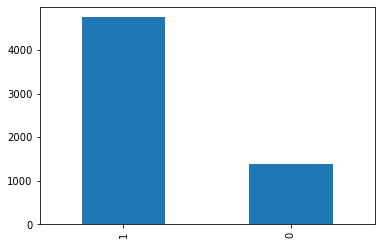

In [126]:
train_data['label'].value_counts().plot(kind = 'bar')

In [16]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0   1026
1      1   3573


In [17]:
print(train_data.isnull().values.any())

False


In [18]:
print(train_data.isnull().sum())

Unnamed: 0    0
내용            0
별점            0
label         0
dtype: int64


In [19]:
train_data.loc[train_data.내용.isnull()]

,Unnamed: 0,내용,별점,label


In [20]:
train_data = train_data.dropna(how = 'any')
print(train_data.isnull().values.any())

False


In [21]:
print(len(train_data))

4599


In [22]:
train_data['내용'] = train_data['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

<ipython-input-22-388f03bd8969>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['내용'] = train_data['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,Unnamed: 0,내용,별점,label
5376,5376,나름만족 음 친구가 쓰는걸 보고 전에 쓰던 블루투스 이어폰이 망가져서 한번 사봣는데...,3,0
5692,5692,너무 좋음 캐 좋음 가볍고 부담 없이 차고다닐 수 있고 수면관리에 만보기까지매일 얼...,5,1
5970,5970,미밴드 강추강추 원래 미밴드 유저였는데 시계기능 추가 보고바로 로 갈아탔어용 ...,5,1
5940,5940,정말 만족합니다 미 피트 어플과 연동해서 사용하는데 정말 만족합니다 주로 시계랑 만...,5,1
2998,2998,좋네요 추천합니다다,4,1


In [24]:
test_data.drop_duplicates(subset = ['내용'], inplace=True) # 중복 제거
test_data['내용'] = test_data['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['내용'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 1532


<ipython-input-24-e2602a0e130a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop_duplicates(subset = ['내용'], inplace=True) # 중복 제거
<ipython-input-24-e2602a0e130a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['내용'] = test_data['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
<ipython-input-24-e2602a0e130a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['내용'] = test_data['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\

In [136]:
train_data['내용'] = train_data['내용'].str.replace('^ +', "")
train_data['내용'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

내용       17
별점        0
label     0
dtype: int64


<ipython-input-136-c691e3f2cf46>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['내용'] = train_data['내용'].str.replace('^ +', "")
<ipython-input-136-c691e3f2cf46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['내용'] = train_data['내용'].str.replace('^ +', "")
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [139]:
train_data.loc[train_data.내용.isnull()][:5]

,내용,별점,label
Unnamed: 0,,,


In [138]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

6115


In [25]:
okt = Okt()
stopwords = ['가','게','고','과','네','는','다','도','들','듯','를','에','와','으로',
             '은','을','의','이','인','임','자','잘','좀','지','하다','한']

In [26]:
X_train = []
for sentence in train_data['내용']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [27]:
print(X_train[:3])

[['나름', '만족', '음', '친구', '쓰다', '보고', '전', '쓰다', '블루투스', '이어폰', '망가지다', '한번', '사', '봣', '늘다', '괜찮다', '것', '같다', '귀', '한쪽', '끼다', '익숙', '치가', '않다', '불편하다', '데', '택배', '오다', '끄다', '보다', '사용', '법도', '쉬다', '나름', '만족', '많이', '파다'], ['너무', '좋다', '캐', '좋다', '가볍다', '부담', '없이', '차고', '다니다', '수', '있다', '수면', '관리', '만', '보기', '까지', '매일', '얼마나', '걸다', '확인', '가능하다', '간편하다', '시간', '확인', '수', '있다', '어제', '자다', '자다', '수면', '체크', '수', '있다', '특히', '수면', '관리', '깊다', '잠', '조금씩', '길어지다', '있다', '걸', '확인', '것', '차다', '좋다'], ['밉다', '밴드', '강', '추강', '추', '원래', '밉다', '밴드', '유저', '이다', '시계', '기능', '추가', '보고', '바로', '로', '갈아타다', '뭐', '심박', '기능', '이런', '것', '차다', '혁신', '적', '이지만', '일단', '시계', '맘', '들다', '가격', '나름', '저렴하다', '자다', '사다', '같다', '해외', '에서', '사오다', '건가', '무', '틀다', '늦어지다', '같다', '친히', '전화', '엄청', '친절', '그냥', '늦다', '오다', '잊다', '먹다', '있다', '생각', '보다', '더', '빨리', '보내다', '차다', '감사하다', '지금', '아주', '자다', '쓰다', '있다', '밴드', '세대', '보다', '밴드', '재질', '좋다', '그냥', '요', '거', '로만', '써다']]


In [30]:
X_test = []
for sentence in test_data['내용']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)
print(X_test[:3])

[['좋다', '가볍다', '예쁘다', '요귀', '밀착', '딱'], ['밉다', '밴드', '쓰다', '있다', '기능', '매우', '많이', '추가', '돼다', '우선', '디스플레이', '표시', '되다', '마음', '들다', '시계', '대용', '이나', '문', '자전', '화', '오다', '때', '진동', '알다', '되게', '좋다', '다만', '스마트', '밴드', '특성', '상', '아주', '크게', '유의', '미하', '쓸모', '많다', '않다'], ['가격', '만족도', '성능', '사용', '편의', '성', '등', '가격', '적정하다', '성능', '대체로', '괜찮다', '사용', '스마트폰', '연결', '오래', '걸리다', '문제', '빼다', '연', '결후', '엔', '스마트폰', '연동', '이니', '편리하다', '상태', '상태', '모두', '만족', '이다', '그', '외', '도움', '되다', '만', '사용', '후기', '로그', '인하다', '때', '로그인오류', '로', '조금', '오래', '걸리다', '연결', '되다', '전화', '알림', '문자', '알림', '시계', '발걸음', '수', '그리고', '심박수', '체크', '까지', '다른', '제품', '하고', '비교', '많이', '해', '서', '밉다', '밴드', '로', '구매', '가격', '대비', '비슷하다', '여자라서', '크다', '제품', '보다는', '작다', '걸', '로', '구매', '같다', '손목', '딱', '맞다', '이쁘다', '사업', '번창', '옥션', '안드로이드', '앱', '작성']]


In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [32]:
print(tokenizer.word_index)

{'좋다': 1, '있다': 2, '되다': 3, '사용': 4, '자다': 5, '보다': 6, '같다': 7, '가격': 8, '없다': 9, '밴드': 10, '가성': 11, '로': 12, '비': 13, '이다': 14, '제품': 15, '구매': 16, '않다': 17, '쓰다': 18, '배송': 19, '받다': 20, '요': 21, '것': 22, '너무': 23, '빠르다': 24, '안': 25, '만': 26, '기능': 27, '폰': 28, '사다': 29, '만족하다': 30, '밉다': 31, '때': 32, '에서': 33, '하고': 34, '생각': 35, '괜찮다': 36, '수': 37, '들다': 38, '오다': 39, '더': 40, '음질': 41, '샤오미': 42, '충전': 43, '안되다': 44, '저렴하다': 45, '대비': 46, '정도': 47, '가다': 48, '저': 49, '성능': 50, '써다': 51, '중': 52, '많이': 53, '적': 54, '일': 55, '못': 56, '거': 57, '되어다': 58, '쓸다': 59, '제': 60, '전화': 61, '디자인': 62, '아니다': 63, '정말': 64, '그냥': 65, '구입': 66, '아주': 67, '조금': 68, '서': 69, '필름': 70, '주문': 71, '이어폰': 72, '시간': 73, '시계': 74, '상품': 75, '해보다': 76, '처음': 77, '이라': 78, '연결': 79, '배터리': 80, '운동': 81, '많다': 82, '그렇다': 83, '불편하다': 84, '편하다': 85, '하나': 86, '알다': 87, '나오다': 88, '수면': 89, '나': 90, '체크': 91, '설정': 92, '아쉽다': 93, '해주다': 94, '만족': 95, '다른': 96, '크다': 97, '문제': 98, '분': 99, '가볍다': 100, '통화':

In [37]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 6716
등장 빈도가 2번 이하인 희귀 단어의 수: 3807
단어 집합에서 희귀 단어의 비율: 56.68552709946396
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.662566982381904


In [38]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2910


In [39]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [40]:
print(X_train[:3])

[[533, 95, 591, 460, 18, 162, 165, 18, 149, 72, 1183, 206, 129, 308, 36, 22, 7, 157, 257, 361, 1532, 17, 84, 562, 136, 39, 378, 6, 4, 1259, 309, 533, 95, 53, 273], [23, 1, 2416, 1, 100, 357, 105, 326, 313, 37, 2, 89, 518, 26, 119, 114, 697, 686, 373, 110, 224, 563, 73, 110, 37, 2, 965, 5, 5, 89, 91, 37, 2, 287, 89, 518, 1131, 923, 1688, 2106, 2, 210, 110, 22, 203, 1], [31, 10, 716, 346, 31, 10, 2107, 14, 74, 27, 152, 162, 111, 12, 888, 214, 741, 27, 889, 22, 203, 54, 575, 131, 74, 170, 38, 8, 533, 45, 5, 29, 7, 534, 33, 2417, 1260, 854, 966, 1261, 7, 61, 196, 65, 211, 39, 1533, 470, 2, 35, 6, 40, 182, 188, 203, 127, 288, 67, 5, 18, 2, 10, 1024, 6, 10, 855, 1, 65, 21, 57, 1534, 51]]


In [41]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [42]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [43]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

4576
4576


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


리뷰의 최대 길이 : 305
리뷰의 평균 길이 : 21.07298951048951


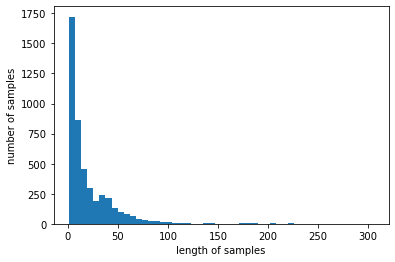

In [46]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [47]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [51]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 90.42832167832168


In [52]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [54]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [55]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [58]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
61/61 [==============================] - 9s 113ms/step - loss: 0.1823 - acc: 0.9437 - val_loss: 0.6068 - val_acc: 0.8199

Epoch 00001: val_acc did not improve from 0.84389
Epoch 2/15
61/61 [==============================] - 7s 123ms/step - loss: 0.1167 - acc: 0.9544 - val_loss: 0.6611 - val_acc: 0.8231

Epoch 00002: val_acc did not improve from 0.84389
Epoch 3/15
61/61 [==============================] - 6s 100ms/step - loss: 0.1105 - acc: 0.9582 - val_loss: 0.7098 - val_acc: 0.8024

Epoch 00003: val_acc did not improve from 0.84389
Epoch 4/15
61/61 [==============================] - 6s 100ms/step - loss: 0.1026 - acc: 0.9631 - val_loss: 0.7233 - val_acc: 0.8057

Epoch 00004: val_acc did not improve from 0.84389
Epoch 5/15
61/61 [==============================] - 7s 117ms/step - loss: 0.1429 - acc: 0.9546 - val_loss: 0.7044 - val_acc: 0.8046

Epoch 00005: val_acc did not improve from 0.84389
Epoch 00005: early stopping


In [59]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

48/48 [==============================] - 2s 23ms/step - loss: 0.4539 - acc: 0.8120

 테스트 정확도: 0.8120


In [60]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [81]:
sam = pd.read_csv("C:/690009/TP2/final_project/member/NTJ/crawlerNsReview/data/PP/sam.csv")
sam

,Unnamed: 0,내용,등록일
0,0,사람들이 불만이 많아 걱정 많이했습니다사고 난 1일7일 발열 느껴졌습니다하지만 이 ...,2021.08.12. 10:54
1,1,s10 5g에서 기변했는데 카페글에 발열 심하다는 얘기가 많아 불안했지만 카메라가...,2021.08.12. 10:39
2,2,s21울트라로 기변했습니다침수된 s20는 as비용만 8090만원이 나오는지라저렴하게...,2021.08.10. 07:09
3,3,안녕하세요4월 말에 구매해서 지금까지 울트라 잘 사용하고 있습니다s21시리즈 문제때...,2021.08.09. 17:50
4,4,사용기종 s21최대가 3435도고 카메라 사용시 36도까지 찍었네요,2021.08.09. 17:00
...,...,...,...
1877,1877,역시 1세대 기술이라서 기대 전혀 안했는데요생각보다 티가 많이나네요저는 좀 예민한 ...,2021.08.12. 13:07
1878,1878,폴드2 사용중입니다이번에 UDC 펜 지원 방수 된다고 한데다 리뷰 영상보고 눈돌아...,2021.08.12. 12:45
1879,1879,udc 쫌 이상함,2021.08.12. 12:43
1880,1880,폴드2랑 디자인은 별 차이가 없지만 UDC디스플레이는 좋네요근데 아쉬운점은 흰화면에...,2021.08.12. 11:57


In [82]:
sam.drop_duplicates(subset = ['내용'], inplace=True) # 중복 제거
sam['내용'] = sam['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
sam['내용'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
sam = sam.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(sam))

전처리 후 테스트용 샘플의 개수 : 1422


<ipython-input-82-195377d8e736>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sam['내용'] = sam['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [83]:
n = 0
for i in sam["내용"][:]:
    n += 1
    print(n)
    sentiment_predict(i)
    

1
98.41% 확률로 긍정 리뷰입니다.

2
80.17% 확률로 긍정 리뷰입니다.

3
84.59% 확률로 긍정 리뷰입니다.

4
99.31% 확률로 긍정 리뷰입니다.

5
89.05% 확률로 긍정 리뷰입니다.

6
96.11% 확률로 긍정 리뷰입니다.

7
92.32% 확률로 긍정 리뷰입니다.

8
89.04% 확률로 긍정 리뷰입니다.

9
78.12% 확률로 긍정 리뷰입니다.

10
89.97% 확률로 긍정 리뷰입니다.

11
62.48% 확률로 긍정 리뷰입니다.

12
85.64% 확률로 긍정 리뷰입니다.

13
97.55% 확률로 긍정 리뷰입니다.

14
93.35% 확률로 긍정 리뷰입니다.

15
56.16% 확률로 부정 리뷰입니다.

16
76.24% 확률로 긍정 리뷰입니다.

17
87.58% 확률로 긍정 리뷰입니다.

18
90.44% 확률로 긍정 리뷰입니다.

19
95.09% 확률로 긍정 리뷰입니다.

20
61.19% 확률로 부정 리뷰입니다.

21
97.23% 확률로 긍정 리뷰입니다.

22
93.71% 확률로 긍정 리뷰입니다.

23
96.44% 확률로 긍정 리뷰입니다.

24
71.97% 확률로 부정 리뷰입니다.

25
76.69% 확률로 긍정 리뷰입니다.

26
94.47% 확률로 긍정 리뷰입니다.

27
84.96% 확률로 긍정 리뷰입니다.

28
99.26% 확률로 긍정 리뷰입니다.

29
99.23% 확률로 긍정 리뷰입니다.

30
82.05% 확률로 긍정 리뷰입니다.

31
96.67% 확률로 긍정 리뷰입니다.

32
63.30% 확률로 부정 리뷰입니다.

33
84.49% 확률로 긍정 리뷰입니다.

34
95.17% 확률로 긍정 리뷰입니다.

35
96.08% 확률로 긍정 리뷰입니다.

36
75.75% 확률로 긍정 리뷰입니다.

37
96.31% 확률로 긍정 리뷰입니다.

38
81.40% 확률로 부정 리뷰입니다.

39
76.59% 확률로 긍정 리뷰입니다.

40
97.87% 확률로 긍정 리뷰입니다.

41
95.68%

99.50% 확률로 긍정 리뷰입니다.

323
98.95% 확률로 긍정 리뷰입니다.

324
90.52% 확률로 긍정 리뷰입니다.

325
99.25% 확률로 긍정 리뷰입니다.

326
88.88% 확률로 긍정 리뷰입니다.

327
89.90% 확률로 긍정 리뷰입니다.

328
96.34% 확률로 긍정 리뷰입니다.

329
59.19% 확률로 긍정 리뷰입니다.

330
77.70% 확률로 긍정 리뷰입니다.

331
97.94% 확률로 긍정 리뷰입니다.

332
99.01% 확률로 긍정 리뷰입니다.

333
96.83% 확률로 긍정 리뷰입니다.

334
93.78% 확률로 긍정 리뷰입니다.

335
99.18% 확률로 긍정 리뷰입니다.

336
83.15% 확률로 긍정 리뷰입니다.

337
87.98% 확률로 긍정 리뷰입니다.

338
60.06% 확률로 긍정 리뷰입니다.

339
94.71% 확률로 긍정 리뷰입니다.

340
98.77% 확률로 긍정 리뷰입니다.

341
93.65% 확률로 긍정 리뷰입니다.

342
56.85% 확률로 부정 리뷰입니다.

343
97.33% 확률로 긍정 리뷰입니다.

344
97.06% 확률로 긍정 리뷰입니다.

345
96.19% 확률로 긍정 리뷰입니다.

346
91.16% 확률로 긍정 리뷰입니다.

347
95.00% 확률로 긍정 리뷰입니다.

348
99.08% 확률로 긍정 리뷰입니다.

349
94.67% 확률로 긍정 리뷰입니다.

350
76.35% 확률로 긍정 리뷰입니다.

351
96.24% 확률로 긍정 리뷰입니다.

352
91.13% 확률로 긍정 리뷰입니다.

353
54.99% 확률로 부정 리뷰입니다.

354
77.49% 확률로 긍정 리뷰입니다.

355
86.37% 확률로 긍정 리뷰입니다.

356
77.93% 확률로 긍정 리뷰입니다.

357
76.29% 확률로 긍정 리뷰입니다.

358
58.84% 확률로 긍정 리뷰입니다.

359
50.69% 확률로 부정 리뷰입니다.

360
99.58% 확률로 긍

51.10% 확률로 부정 리뷰입니다.

640
73.87% 확률로 긍정 리뷰입니다.

641
99.04% 확률로 긍정 리뷰입니다.

642
73.95% 확률로 긍정 리뷰입니다.

643
94.82% 확률로 긍정 리뷰입니다.

644
95.38% 확률로 긍정 리뷰입니다.

645
98.14% 확률로 긍정 리뷰입니다.

646
94.95% 확률로 긍정 리뷰입니다.

647
98.95% 확률로 긍정 리뷰입니다.

648
96.54% 확률로 긍정 리뷰입니다.

649
88.92% 확률로 긍정 리뷰입니다.

650
97.51% 확률로 긍정 리뷰입니다.

651
99.39% 확률로 긍정 리뷰입니다.

652
98.99% 확률로 긍정 리뷰입니다.

653
83.80% 확률로 긍정 리뷰입니다.

654
88.63% 확률로 부정 리뷰입니다.

655
67.01% 확률로 부정 리뷰입니다.

656
65.95% 확률로 긍정 리뷰입니다.

657
56.48% 확률로 긍정 리뷰입니다.

658
81.01% 확률로 긍정 리뷰입니다.

659
99.08% 확률로 긍정 리뷰입니다.

660
84.11% 확률로 긍정 리뷰입니다.

661
78.53% 확률로 긍정 리뷰입니다.

662
96.41% 확률로 긍정 리뷰입니다.

663
98.79% 확률로 긍정 리뷰입니다.

664
98.84% 확률로 긍정 리뷰입니다.

665
97.84% 확률로 긍정 리뷰입니다.

666
79.77% 확률로 부정 리뷰입니다.

667
89.78% 확률로 긍정 리뷰입니다.

668
85.90% 확률로 긍정 리뷰입니다.

669
94.88% 확률로 긍정 리뷰입니다.

670
97.06% 확률로 긍정 리뷰입니다.

671
94.29% 확률로 긍정 리뷰입니다.

672
96.74% 확률로 긍정 리뷰입니다.

673
97.46% 확률로 긍정 리뷰입니다.

674
93.54% 확률로 긍정 리뷰입니다.

675
98.67% 확률로 긍정 리뷰입니다.

676
73.07% 확률로 긍정 리뷰입니다.

677
94.22% 확률로 긍

98.21% 확률로 긍정 리뷰입니다.

958
96.84% 확률로 긍정 리뷰입니다.

959
93.48% 확률로 긍정 리뷰입니다.

960
87.90% 확률로 긍정 리뷰입니다.

961
97.96% 확률로 긍정 리뷰입니다.

962
98.61% 확률로 긍정 리뷰입니다.

963
63.45% 확률로 부정 리뷰입니다.

964
60.59% 확률로 부정 리뷰입니다.

965
95.31% 확률로 긍정 리뷰입니다.

966
98.91% 확률로 긍정 리뷰입니다.

967
83.20% 확률로 긍정 리뷰입니다.

968
96.33% 확률로 긍정 리뷰입니다.

969
71.73% 확률로 긍정 리뷰입니다.

970
99.62% 확률로 긍정 리뷰입니다.

971
94.60% 확률로 긍정 리뷰입니다.

972
99.22% 확률로 긍정 리뷰입니다.

973
98.71% 확률로 긍정 리뷰입니다.

974
93.51% 확률로 긍정 리뷰입니다.

975
96.29% 확률로 긍정 리뷰입니다.

976
77.66% 확률로 긍정 리뷰입니다.

977
99.41% 확률로 긍정 리뷰입니다.

978
54.91% 확률로 긍정 리뷰입니다.

979
92.41% 확률로 긍정 리뷰입니다.

980
74.44% 확률로 긍정 리뷰입니다.

981
90.87% 확률로 긍정 리뷰입니다.

982
59.32% 확률로 긍정 리뷰입니다.

983
98.23% 확률로 긍정 리뷰입니다.

984
99.22% 확률로 긍정 리뷰입니다.

985
98.86% 확률로 긍정 리뷰입니다.

986
51.00% 확률로 부정 리뷰입니다.

987
98.59% 확률로 긍정 리뷰입니다.

988
98.03% 확률로 긍정 리뷰입니다.

989
97.58% 확률로 긍정 리뷰입니다.

990
56.97% 확률로 긍정 리뷰입니다.

991
99.38% 확률로 긍정 리뷰입니다.

992
97.38% 확률로 긍정 리뷰입니다.

993
99.35% 확률로 긍정 리뷰입니다.

994
92.49% 확률로 긍정 리뷰입니다.

995
98.38% 확률로 긍

98.23% 확률로 긍정 리뷰입니다.

1264
98.13% 확률로 긍정 리뷰입니다.

1265
96.07% 확률로 긍정 리뷰입니다.

1266
79.05% 확률로 긍정 리뷰입니다.

1267
58.40% 확률로 긍정 리뷰입니다.

1268
99.10% 확률로 긍정 리뷰입니다.

1269
72.56% 확률로 부정 리뷰입니다.

1270
51.94% 확률로 부정 리뷰입니다.

1271
99.48% 확률로 긍정 리뷰입니다.

1272
99.18% 확률로 긍정 리뷰입니다.

1273
99.14% 확률로 긍정 리뷰입니다.

1274
98.30% 확률로 긍정 리뷰입니다.

1275
79.93% 확률로 긍정 리뷰입니다.

1276
95.03% 확률로 긍정 리뷰입니다.

1277
97.33% 확률로 긍정 리뷰입니다.

1278
90.84% 확률로 긍정 리뷰입니다.

1279
81.27% 확률로 긍정 리뷰입니다.

1280
89.88% 확률로 긍정 리뷰입니다.

1281
98.98% 확률로 긍정 리뷰입니다.

1282
98.16% 확률로 긍정 리뷰입니다.

1283
99.34% 확률로 긍정 리뷰입니다.

1284
93.87% 확률로 긍정 리뷰입니다.

1285
96.33% 확률로 긍정 리뷰입니다.

1286
98.80% 확률로 긍정 리뷰입니다.

1287
73.09% 확률로 긍정 리뷰입니다.

1288
95.50% 확률로 긍정 리뷰입니다.

1289
93.04% 확률로 긍정 리뷰입니다.

1290
96.97% 확률로 긍정 리뷰입니다.

1291
88.41% 확률로 긍정 리뷰입니다.

1292
87.16% 확률로 긍정 리뷰입니다.

1293
82.01% 확률로 긍정 리뷰입니다.

1294
97.63% 확률로 긍정 리뷰입니다.

1295
70.77% 확률로 긍정 리뷰입니다.

1296
97.97% 확률로 긍정 리뷰입니다.

1297
95.86% 확률로 긍정 리뷰입니다.

1298
91.97% 확률로 긍정 리뷰입니다.

1299
67.86% 확률로 긍정 리뷰입니다.

1300
9